In [1]:
%matplotlib inline

import setGPU

import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize

import glob

setGPU: Setting GPU to: 1


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
gen_weights = '/nfshome/vitoriabp/Keras-GAN/wgan/trial3_batch_size_128_epochs_2000/weights/generator_weights_epoch_1000_trial3_bs_128.h5'

gen_model = '/nfshome/vitoriabp/Keras-GAN/wgan/trial3_batch_size_128_epochs_2000/weights/generator_modeltrial3_bs_128.json'

In [28]:
def loadModel(name, weights=False):
    '''
    Adapted from Kaustuv Datta and Jayesh Mahapatra's CaloImageMacros.
    Loads models from json file.
    :parameter name: name of the json file.
    :type name: str
    :parameter weights: whether or not to load the weights.
    :type weights: bool
    :return: loaded model.
    '''
    from keras.models import model_from_json
    json_file = open('%s' % name, 'r')
    loaded = json_file.read()
    json_file.close()

    model = model_from_json(loaded)

    # load weights into new model
    if weights == True:
        model.load_weights('%s.h5' % name)
    # print(model.summary())

    #print("Loaded model from disk")
    return model

In [5]:
latent_space=100
batch_size=128

noise = np.random.normal(0, 1, (batch_size, latent_space))

In [10]:
all_g_weight = '/nfshome/vitoriabp/Keras-GAN/wgan/trial3_batch_size_128_epochs_2000/weights/generator_weights_epoch_*.h5'

In [166]:
means = []
stds = []
epochs = []

for w in glob.glob(all_g_weight):
    #g = loadModel(gen_model)
    epoch = w.split('/')[-1].split('_')[3]
    #print(int(epoch))
    g.load_weights(w)
    generated_images = g.predict(noise)
    generated_images = generated_images.squeeze()
    #print(np.mean(generated_images))
    #print(np.std(generated_images))
    means.append(np.mean(generated_images))
    stds.append(np.std(generated_images))
    epochs.append(int(epoch))

In [120]:
epoch_mean = np.array([np.asarray(epochs), np.asarray(means)])

In [167]:
epoch_mean_sorted = (epoch_mean.T)[np.argsort(epoch_mean[0])]
#plt.scatter(epoch_mean_sorted[:,0], epoch_mean_sorted[:,1])

In [94]:
errors = []
for std in stds:
    error = std/np.sqrt(len(means))
    #print(error)
    errors.append(error)

In [176]:
# plt.scatter(epoch_mean_sorted[:,0], epoch_mean_sorted[:,1])
# plt.title("Mean energy generated", size=16)
# plt.xlabel("epoch", size=16)
# plt.ylabel("$\mu$ (GeV)", size=16)
# #plt.savefig("means.png")
# plt.errorbar(epoch_mean_sorted[:,0], epoch_mean_sorted[:,1], yerr=errors, color='grey', alpha = 0.5, fmt='o')

<Container object of 3 artists>

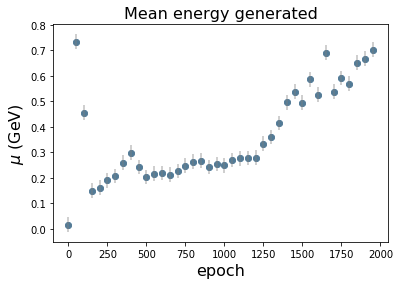

In [177]:
plt.scatter(epoch_mean_sorted[:,0], epoch_mean_sorted[:,1])
plt.title("Mean energy generated", size=16)
plt.xlabel("epoch", size=16)
plt.ylabel("$\mu$ (GeV)", size=16)
#plt.savefig("means.png")
plt.errorbar(epoch_mean_sorted[:,0], epoch_mean_sorted[:,1], yerr=np.std(means)/np.sqrt(len(means)), color='grey', alpha = 0.5, fmt='o')

In [178]:
## Should aim for:
np.mean(X)

0.02276984

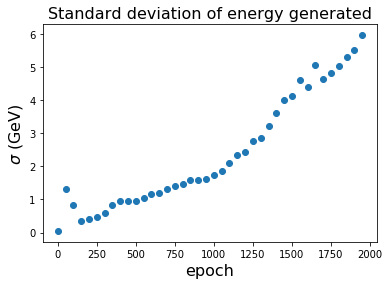

In [87]:
plt.scatter(epochs, stds)
plt.title("Standard deviation of energy generated", size=16)
plt.xlabel("epoch", size=16)
plt.ylabel("$\sigma$ (GeV)", size=16)
#plt.savefig("stds.png")

In [89]:
f = h5py.File('/bigdata/shared/HGCAL_data/new/all_noPU.h5', 'r')

X = np.asarray(f['X'])

X = X.squeeze()

In [91]:
np.std(X)

0.3552384